In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt
import seaborn as sns
import pandas as pd
import torch
import gymnasium as gym
import gym_bart
import itertools
from umap import UMAP
from plotting_utils import (
    set_rc, 
    add_abc_to_subaxes, 
    colors, 
    rgb_colors
)
from model_evaluation import (
    forced_action_evaluate, 
    meta_bart_callback,
    meta_bart_multi_callback,
    reshape_parallel_evalu_res,
    forced_action_evaluate_multi,
)
from bart_behavior_analysis import (
    plot_1color5fsize,
    plot_1colornfsize
)
from read_experiments import average_runs, load_exp_df
import re

from functools import partial
import sys
sys.path.append('../')
from ppo.envs import make_vec_env
import pickle
from tqdm import tqdm
from collections import defaultdict
from pathlib import Path

from bart_representation_analysis import *
from bart_compress_visualize_decode import *
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

set_rc()

In [ ]:
give_rew = ['', 'giverew_']
postfixes = ['', 'pop0.05', 'pop0.1', 'pop0.2']
models = [1.0, 1.2, 1.5, 1.7, 2.0]
trials = range(3)
chks = np.arange(10, 243, 30)

give_labels = ['Rew not shown', 'Rew shown']
pop_labels = ['0', '-0.05', '-0.1', '-0.2']
pop_vals = [0, -0.05, -0.1, -0.2]
p_labels = ['1.0',' 1.2', '1.5', '1.7', '2.0']
chk_labels = [str(c) for c in chks]
chk_axis = 'Checkpoint'
pop_axis = 'Punishment on pop'
p_axis = 'p'

iterators = [give_rew, postfixes, models, trials, chks]
# iterators = [postfixes, models, trials, chks]
iterators_idxs = [range(len(i)) for i in iterators]
sizes = [len(i) for i in iterators]

res = pickle.load(open('data/meta_representation_results', 'rb'))
ares = pickle.load(open('data/meta_rnn_gradients', 'rb'))

In [8]:
idx = select_random_model()[:4]
cluster_activ = ares['cluster_activations'][idx]

In [9]:
cluster_activ.shape

(7921, 6)

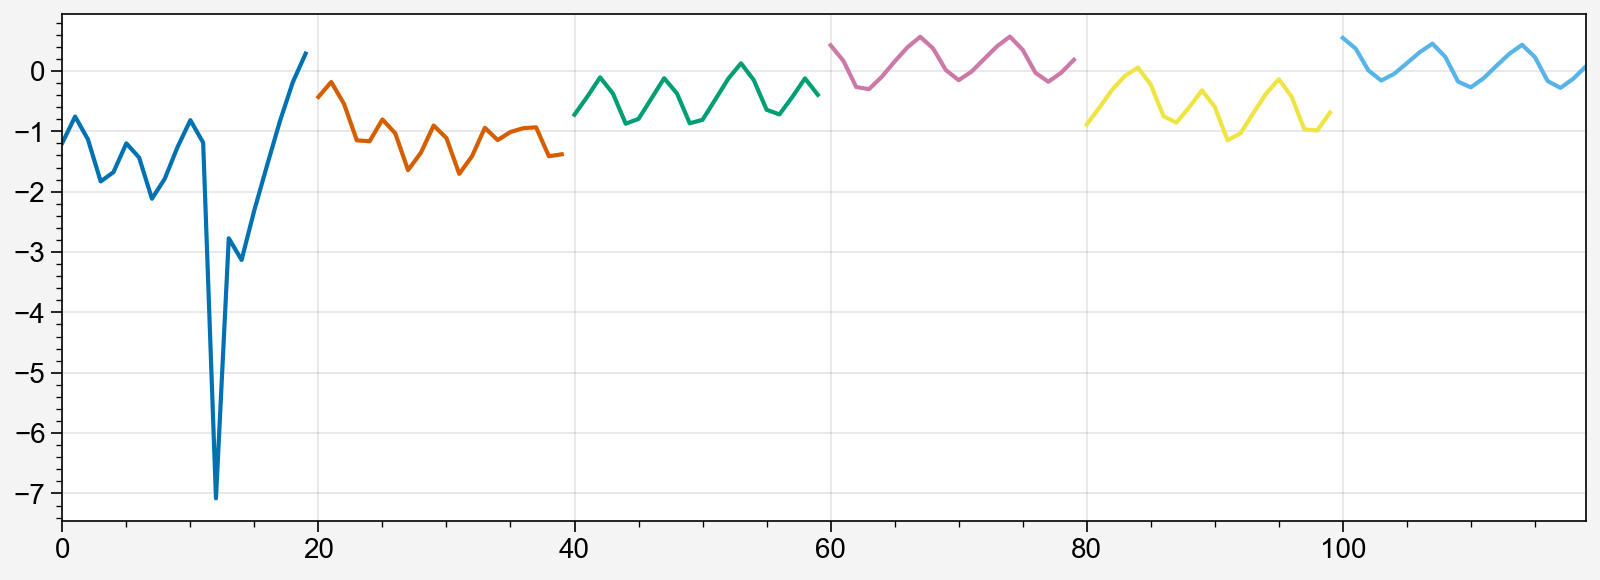

In [23]:
fig, ax = pplt.subplots(refaspect=3, figwidth=8)
for i in range(6):
    x = np.arange(i*20, (i+1)*20)
    y = cluster_activ[i*200+200:i*200+220]
    ax.plot(x, y[:, 4])


In [12]:
y

array([[ 0.35339556, -0.03165343, -0.57873298, -0.59477925,  0.55582334,
         0.33800305],
       [ 0.67140053, -0.56467454, -0.60044591, -0.79297975,  0.62020157,
         0.37495757],
       [ 0.97246903, -1.16843686, -0.63130539, -0.90578955,  0.66235237,
         0.40775956],
       [ 1.24266981, -1.77018511, -0.67093989, -0.93297666,  0.68924082,
         0.43799965],
       [ 1.19844665, -1.16013397, -0.80749489,  0.75991223,  0.57481227,
        -1.49014316],
       [-1.53433594, -1.03700449, -1.00106751,  0.9305694 ,  0.25150264,
         1.67345863],
       [-1.18994788,  0.19460639, -0.76380249,  0.88673088,  0.01063499,
         0.63438119],
       [-0.87742147,  0.64522719, -0.65296468,  0.64221192,  0.04435293,
         0.30298924],
       [-0.58291049,  0.75879565, -0.60185508,  0.3255088 ,  0.16252565,
         0.23175464],
       [-0.28507496,  0.66016707, -0.58213317, -0.0091367 ,  0.31140603,
         0.25236488],
       [ 0.02641943,  0.39443973, -0.58100988, -0.